## <b>Sprint 9 - Proyecto</b>

In [124]:
#Iniciamos las librerías
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st

In [125]:
#Leemos los datos
visits = pd.read_csv('datasets/visits_log_us.csv')
orders = pd.read_csv('datasets/orders_log_us.csv')
costs = pd.read_csv('datasets/costs_us.csv')

<h3><b>Preparación de los datos:</b></h3>

<h4><i>Orders:</i></h4>

In [126]:
#Revisamos la información general
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [127]:
#Revisamos los datos númericos generales
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [128]:
#Impresión rápida de nuestros datos para analizar el contenido
orders.sample(5)

,Buy Ts,Revenue,Uid
35667,2018-02-19 12:07:00,9.78,16044301972575269275
12595,2017-10-13 16:44:00,18.33,15355757193195837349
30234,2018-01-20 17:45:00,1.83,16707044443717841535
901,2017-06-08 00:54:00,0.15,10291050579698949982
41603,2018-03-24 23:38:00,2.44,1380513253103135424


In [129]:
#Revisamos los valores vacíos
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [130]:
#Revisamos si tenemos datos duplicados
duplicates = orders.duplicated().sum()
print('Valores duplicados: ',duplicates)

Valores duplicados:  0


In [131]:
#Corregimos los nombres de nuestras columnas a minúsculas
orders.columns = orders.columns.str.lower()
#Corregimos los nombres de las columnas
orders.columns = orders.columns.str.replace(' ', '_')
#Confirmamos que se encuentren corregidas
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [132]:
#Corregimos el tipo de dato de object a datetime
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [133]:
#Confirmamos que todos los cambios se hayan realizado
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [134]:
orders.sample()

,buy_ts,revenue,uid
1204,2017-06-09 22:53:00,1.22,1795769935575283901


<h4><i>Visits:</i></h4>

In [135]:
#Revisamos la información general
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [136]:
#Revisamos los datos númericos generales
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [137]:
#Impresión rápida de nuestros datos para analizar el contenido
visits.sample(5)

,Device,End Ts,Source Id,Start Ts,Uid
167898,touch,2017-10-29 22:44:00,2,2017-10-29 22:39:00,8407179466910472194
228483,desktop,2017-06-28 14:59:00,3,2017-06-28 14:49:00,12277430655572988310
309777,touch,2018-05-18 07:20:00,1,2018-05-18 07:14:00,3601073632122636040
33608,desktop,2018-05-08 22:25:00,4,2018-05-08 21:54:00,6343488163097802108
317462,desktop,2018-01-20 12:03:00,3,2018-01-20 12:01:00,10243905947528440530


In [138]:
#Revisamos los valores vacíos
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [139]:
#Revisamos si tenemos datos duplicados
duplicates = visits.duplicated().sum()
print('Valores duplicados: ',duplicates)

Valores duplicados:  0


In [140]:
#Corregimos los nombres de nuestras columnas a minúsculas
visits.columns = visits.columns.str.lower()
#Corregimos los nombres de las columnas
visits.columns = visits.columns.str.replace(' ', '_')
#Confirmamos que se encuentren corregidas
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [141]:
#Corregimos el tipo de dato de object a datetime
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [142]:
#Confirmamos que todos los cambios se hayan realizado
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [143]:
visits.sample()

,device,end_ts,source_id,start_ts,uid
171461,desktop,2018-05-14 20:33:00,5,2018-05-14 20:33:00,15105834715424812424


<h4><i>Costs:</i></h4>

In [144]:
#Revisamos la información general
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [145]:
#Revisamos los datos númericos generales
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [146]:
#Impresión rápida de nuestros datos para analizar el contenido
costs.sample(5)

,source_id,dt,costs
139,1,2017-10-18,66.20
1793,5,2018-05-09,61.65
1535,5,2017-08-23,82.29
927,3,2017-12-19,218.25
594,2,2018-01-18,126.74


In [147]:
#Revisamos los valores vacíos
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [148]:
#Revisamos si tenemos datos duplicados
duplicates = costs.duplicated().sum()
print('Valores duplicados: ',duplicates)

Valores duplicados:  0


In [149]:
#Corregimos el tipo de dato de object a datetime
costs['dt'] = pd.to_datetime(costs['dt'])

In [150]:
#Confirmamos que todos los cambios se hayan realizado
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [151]:
costs.sample()

,source_id,dt,costs
1618,5,2017-11-14,198.26


<h4>Observaciones:</h4>
Analizando los datos, podemos observar que no contamos con valores NULL o vacíos, ni duplicados. 
Se tomo la desición de corregir el nombre de las columnas a mínusculas y con estilo snake para tener el formato correcto. De igual forma se cambió el tipo de dato de las columnas que contenían fecha y horarios de object a datetime. 

<h3><b>Análisis de los datos:</b></h3>

<h4>Visitas</h4>

<h5>¿Cántas personas lo usan cada día, semana y mes?</h5>

In [152]:
#Vamos a obtener el día, mes y año de cada sesión
visits['year_ts'] = visits['start_ts'].dt.isocalendar().year
visits['month_ts'] = visits['start_ts'].dt.month
visits['week_ts'] = visits['start_ts'].dt.isocalendar().week
visits['date_ts'] = visits['start_ts'].dt.date

#Vamos a calcular el DAU, WAU y MAU de los datos de visitas.
dau_total = visits.groupby('date_ts').agg({'uid':'nunique'}).mean()
mau_total = visits.groupby(['year_ts','month_ts']).agg({'uid':'nunique'}).mean()
wau_total = visits.groupby(['year_ts','week_ts']).agg({'uid':'nunique'}).mean()

print('¿Cántas personas lo usan cada día, semana y mes?\nNúmero de usuarios activos:\n')
print(f"Diarios: {dau_total.uid:.0f}")
print(f"Semanales: {wau_total.uid:.0f}")
print(f"Mensuales: {mau_total.uid:.0f}")

¿Cántas personas lo usan cada día, semana y mes?
Número de usuarios activos:

Diarios: 908
Semanales: 5716
Mensuales: 23228


<h5>¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).</h5>

In [153]:
#Se agrupan las sesiones por día, vamos a contar las sesiones y los usuarios únicos.
sessions_per_user = visits.groupby('date_ts').agg({'uid':['count','nunique']})
#Cambiamos el los nombres de la columna para identificarlos
sessions_per_user.columns = ['n_sessions','n_users']
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions']/sessions_per_user['n_users']

print('¿Cuántas sesiones hay por día?\n')
print(f"En promedio, hay {sessions_per_user['n_sessions'].mean():.2f} sesiones por día.")
print(f"En promedio, cada usuario tiene {sessions_per_user['sess_per_user'].mean():.2f} sesiones por día.")


¿Cuántas sesiones hay por día?

En promedio, hay 987.36 sesiones por día.
En promedio, cada usuario tiene 1.08 sesiones por día.


<h5>¿Cuál es la duración de cada sesión?</h5>

In [154]:
#Vamos a obtener la diferencia de las sesiones para calcular su duración
visits['sess_duration_sec'] = (visits['end_ts']-visits['start_ts']).dt.seconds
print(visits[['start_ts','end_ts','sess_duration_sec']].describe())


                            start_ts                         end_ts  \
count                         359400                         359400   
mean   2017-12-18 06:17:32.010517760  2017-12-18 06:28:15.036205056   
min              2017-06-01 00:01:00            2017-06-01 00:02:00   
25%              2017-10-15 09:41:00            2017-10-15 09:45:45   
50%              2017-12-18 18:46:00            2017-12-18 18:59:30   
75%              2018-02-28 09:54:00            2018-02-28 10:08:15   
max              2018-05-31 23:59:00            2018-06-01 01:26:00   
std                              NaN                            NaN   

       sess_duration_sec  
count      359400.000000  
mean          643.506489  
min             0.000000  
25%           120.000000  
50%           300.000000  
75%           840.000000  
max         84480.000000  
std          1016.334786  


<Axes: >

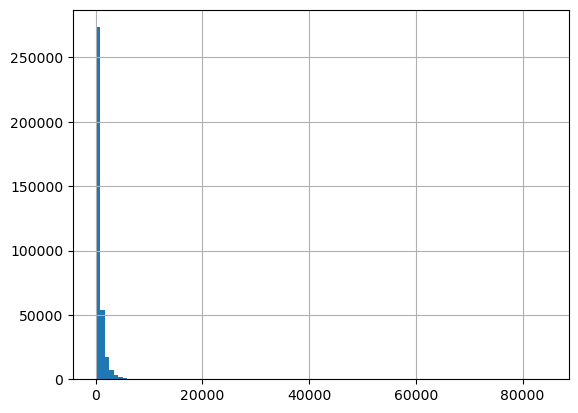

In [155]:
#Vamos a visualizar la ducarión en un histograma
visits['sess_duration_sec'].hist(bins=100)

In [156]:
#Al no ser una distribución normal vamos a cálcular la moda
asl = visits['sess_duration_sec'].mode()
print("¿Cuál es la duración de cada sesión?\n")
print(f"La duración de cada sesión cálculada con la moda es de {asl[0]} segundos.")

¿Cuál es la duración de cada sesión?

La duración de cada sesión cálculada con la moda es de 60 segundos.


<h5>¿Con qué frecuencia los usuarios regresan?</h5>

In [157]:
#Vamos a obtener el número de sesiones por usuario
sess_users = visits.groupby('uid').agg({'uid':['count']})
sess_users.columns = ['n_sessions_per_user']

#Vamos a filtrar a los usuarios que tienen más de una sesión iniciada y contarlos
returning_users = sess_users[sess_users['n_sessions_per_user'] > 1].shape[0]
#Vamos a contar a todos los usuarios
total_users = visits['uid'].nunique()

#Vamos a obtener el porcentaje de frecuencia con el que regresan los usuarios
frequency_return = returning_users/total_users

#Vamos a calcular el Factor de adherencia.
sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total * 100

print("¿Con qué frecuencia los usuarios regresan?\n")
print(f"Frecuencia con la que los usuarios regresan: {frequency_return:.2%}")
print(f"Factor de adherencia semanal: {sticky_wau[0]:.2f}%")
print(f"Factor de adherencia mensual: {sticky_mau[0]:.2f}%")

¿Con qué frecuencia los usuarios regresan?

Frecuencia con la que los usuarios regresan: 22.85%
Factor de adherencia semanal: 15.88%
Factor de adherencia mensual: 3.91%


/var/folders/z8/z7ff3tyd5872vxcp6341_nzw0000gn/T/ipykernel_78101/1115040396.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Factor de adherencia semanal: {sticky_wau[0]:.2f}%")
/var/folders/z8/z7ff3tyd5872vxcp6341_nzw0000gn/T/ipykernel_78101/1115040396.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Factor de adherencia mensual: {sticky_mau[0]:.2f}%")


<h4>Conclusiones Visitas:</h4>
<p>
En promedio, recibimos 908 usuarios únicos que visitan nuestro sitio web. En cuanto a las sesiones diarias, el promedio es de 987, lo que indica que el número de usuarios con más de una sesión al día no es muy alto.<br>

Analizando la duración de las sesiones, calculamos un promedio de 643.50 segundos. Sin embargo, al graficar estos datos, observamos que no siguen una distribución normal. Por ello, se optó por calcular la moda para obtener una medida más representativa, resultando en una duración de 60 segundos como la más frecuente por sesión. Considerando que se trata de un sitio web de venta de entradas para eventos, esta duración parece baja. Dado que en la página puede haber más de un evento y que el proceso de conversión (compra) puede requerir más tiempo, sería importante analizar los embudos de conversión y los puntos del sitio con los que el usuario interactúa durante su sesión. Esto ayudaría a entender por qué abandonan el sitio y si es necesario realizar ajustes para aumentar el tiempo de permanencia.<br>

También analizamos la frecuencia con la que los usuarios regresan al sitio. En general, observamos que el 22.8% de los usuarios regresan. Al profundizar más, calculamos una adherencia semanal del 15.88% y una adherencia mensual del 3.91%. Estos datos muestran que, conforme pasa el tiempo, los usuarios disminuyen su frecuencia de retorno al sitio. Esto representa una oportunidad para implementar promociones o campañas de marketing dirigidas a los clientes después de cierto periodo de inactividad, con el objetivo de motivarlos a regresar al sitio.
</p>


<h4>Ventas</h4>

<h5><b>¿Cuándo empieza la gente a comprar?</b></h5>

In [158]:
#Vamos a obtener la fecha de la primer compra por usuario y su primer sesión
first_buy_ts = orders.groupby('uid')['buy_ts'].min()
first_buy_ts.name = 'first_buy_ts'
orders = orders.join(first_buy_ts, on='uid')
first_session_ts = visits.groupby('uid')['start_ts'].min()
first_session_ts.name = 'first_session_ts'
orders = orders.join(first_session_ts, on='uid')

In [159]:
#Vamos a obtener el valor en días para los tipos de datos
#orders['first_buy_day'] = orders['first_buy_ts'].astype('datetime64[D]')
orders['first_buy_day'] = pd.to_datetime(orders['first_buy_ts']).dt.date
#orders['first_session_day'] = orders['first_session_ts'].astype('datetime64[D]')
orders['first_session_day'] = pd.to_datetime(orders['first_session_ts']).dt.date
#Agrupamos nuestra información por día de primera sesión y compra
cohort_days = orders.groupby(['first_buy_day','first_session_day']).agg({'uid':'nunique','revenue':'sum'}).reset_index()
#Obtenemos la diferencia de días entre la sesión y la compra
cohort_days['cohort_lifetime'] = cohort_days['first_buy_day'] - cohort_days['first_session_day']
#Agrupamos nuestros datos por diferencia de días
cohort_days = cohort_days.groupby('cohort_lifetime')['uid'].count().reset_index()

#Obtenemos el promedio de usuarios de forma general y en los primeros 30 días
general_mean = cohort_days['uid'].mean()
thirty_days_mean = cohort_days[cohort_days['cohort_lifetime'] < '30 days']['uid'].mean()
general_mode = cohort_days['cohort_lifetime'].mode()
print('¿Cuándo empieza la gente a comprar?\n')
print(f'En promedio, convierten {general_mean:.0f} usuarios por día después de su primera visita.')
print(f'Durante los primeros 30 días, el promedio de conversiones diarias es de {thirty_days_mean:.0f} usuarios.')
print(f'El día más común en el que los usuarios realizan su primera compra es: {general_mode.iloc[0]} días después de su primera sesión.')


¿Cuándo empieza la gente a comprar?

En promedio, convierten 24 usuarios por día después de su primera visita.
Durante los primeros 30 días, el promedio de conversiones diarias es de 125 usuarios.
El día más común en el que los usuarios realizan su primera compra es: 0 days 00:00:00 días después de su primera sesión.


In [160]:
print(cohort_days[cohort_days['cohort_lifetime'] <= '30 days'])


   cohort_lifetime  uid
0           0 days  363
1           1 days  347
2           2 days  284
3           3 days  228
4           4 days  220
5           5 days  193
6           6 days  175
7           7 days  154
8           8 days  144
9           9 days  123
10         10 days  110
11         11 days   93
12         12 days   78
13         13 days  104
14         14 days   96
15         15 days   98
16         16 days   73
17         17 days   84
18         18 days   81
19         19 days   69
20         20 days   75
21         21 days   98
22         22 days   71
23         23 days   59
24         24 days   59
25         25 days   50
26         26 days   63
27         27 days   55
28         28 days   60
29         29 days   55
30         30 days   49


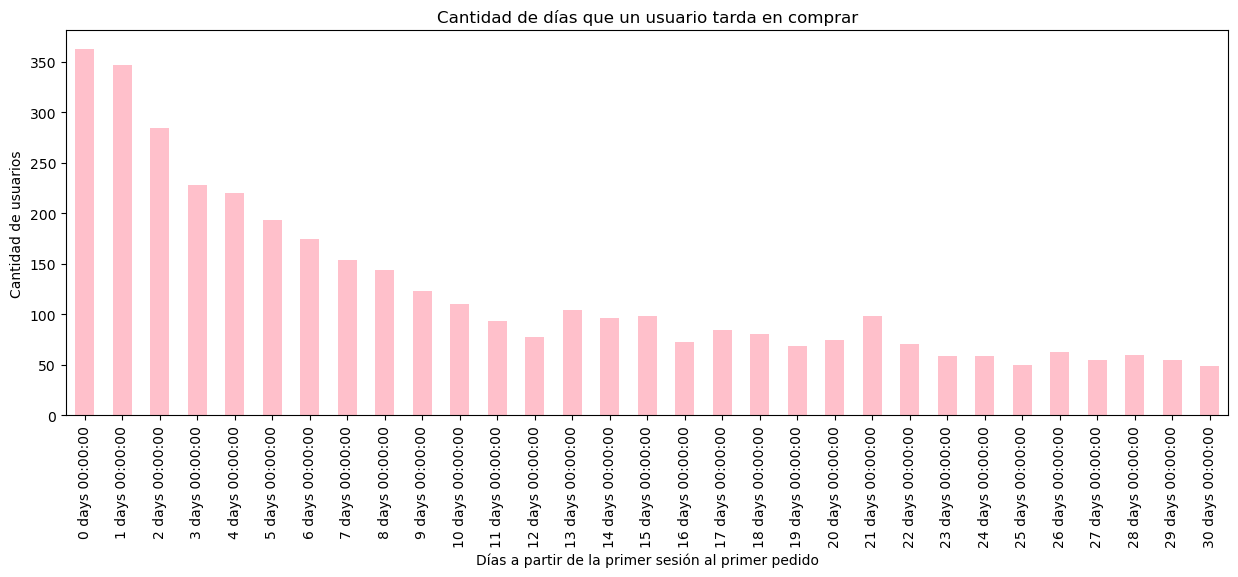

In [161]:
#Visualizamos el comportamiento de la conversión en los primeros 30 días
cohort_days[cohort_days['cohort_lifetime'] <= '30 days'].plot(kind='bar', 
                x ='cohort_lifetime', 
                y='uid', 
                color='pink', 
                title='Cantidad de días que un usuario tarda en comprar',
                legend = False,
                figsize =[15,5],
                xlabel = 'Días a partir de la primer sesión al primer pedido',
                ylabel = 'Cantidad de usuarios'
               )
plt.show()

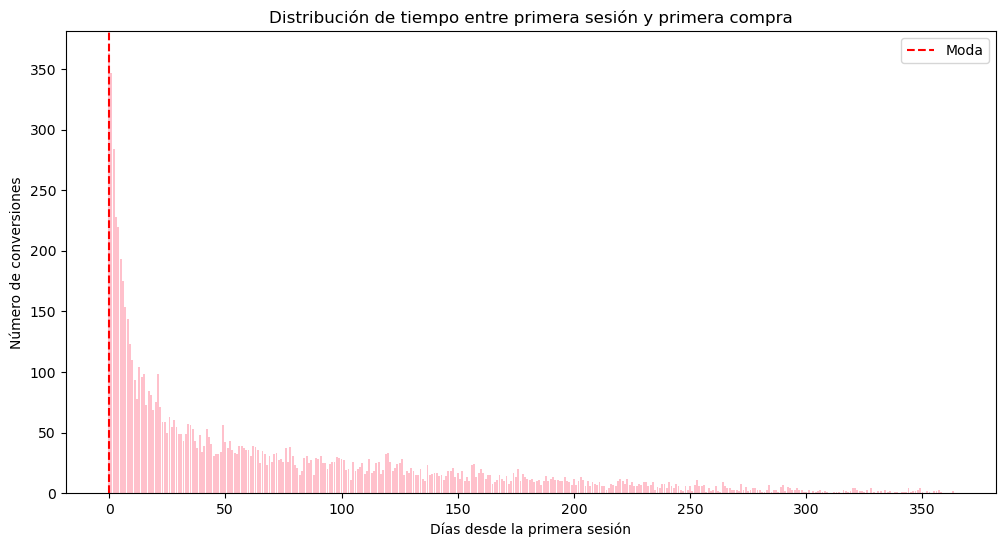

In [162]:
cohort_days['days'] = cohort_days['cohort_lifetime'].dt.days
plt.figure(figsize=(12,6))
plt.title('Distribución de tiempo entre primera sesión y primera compra')
plt.xlabel('Días desde la primera sesión')
plt.ylabel('Número de conversiones')
plt.bar(cohort_days['days'], cohort_days['uid'],color=['pink'])
plt.axvline(x=general_mode.iloc[0].days, color='red', linestyle='--', label='Moda')
plt.legend()
plt.show()

<h5><b>¿Cuántos pedidos hacen durante un período de tiempo dado?</b></h5>

In [163]:
#Vamos a obtener los meses para crear una cohorte 
orders['order_month'] = pd.to_datetime(orders['buy_ts']).dt.strftime('%y-%m')
orders['first_order_month'] = pd.to_datetime(orders['first_buy_day']).dt.strftime('%y-%m')
#agrupamos por fecha para ver el número de pedidos creados de forma mensual
months_group = orders.groupby('order_month')['uid'].count().reset_index()
months_group

,order_month,uid
0,17-06,2354
1,17-07,2363
2,17-08,1807
3,17-09,3387
4,17-10,5679
5,17-11,5659
6,17-12,6218
7,18-01,4721
8,18-02,5281
9,18-03,5326


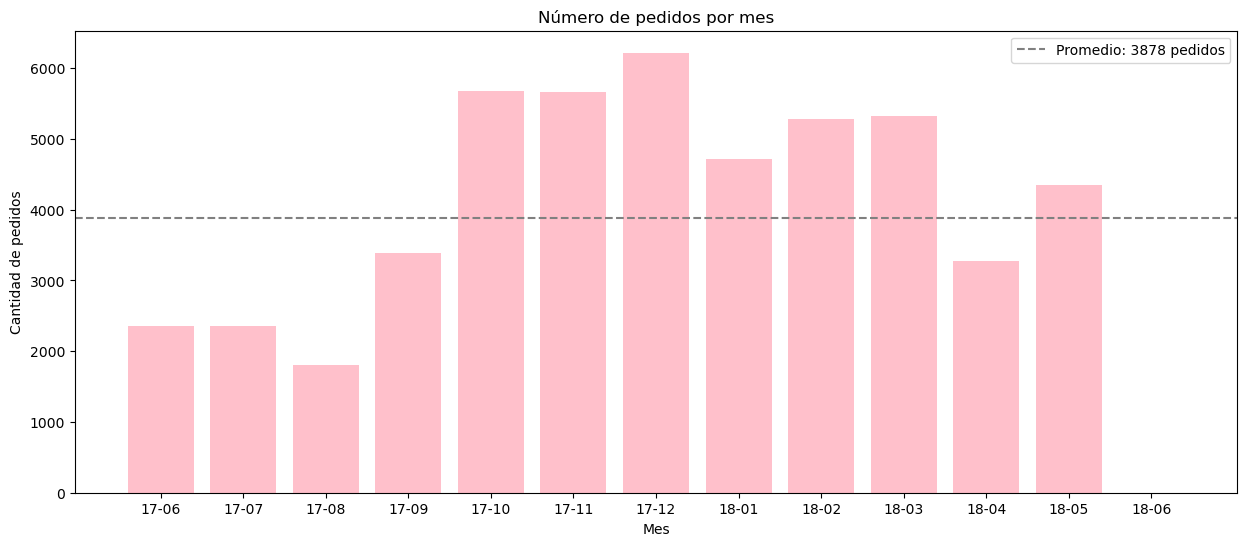

In [164]:
#Obtenemos el promedio de los usuarios para observar el comportamiento general
means_orders = months_group['uid'].mean()
#Gráficamos los datos obtenidos
plt.figure(figsize=(15,6))
plt.bar(months_group['order_month'], months_group['uid'], color='pink')
plt.axhline(means_orders, color='gray', linestyle='--', label=f'Promedio: {means_orders:.0f} pedidos')
plt.xlabel('Mes')
plt.ylabel('Cantidad de pedidos')
plt.title('Número de pedidos por mes')
plt.legend()
plt.show()

<Axes: title={'center': 'Cohorts número de pedidos'}, xlabel='order_month', ylabel='first_order_month'>

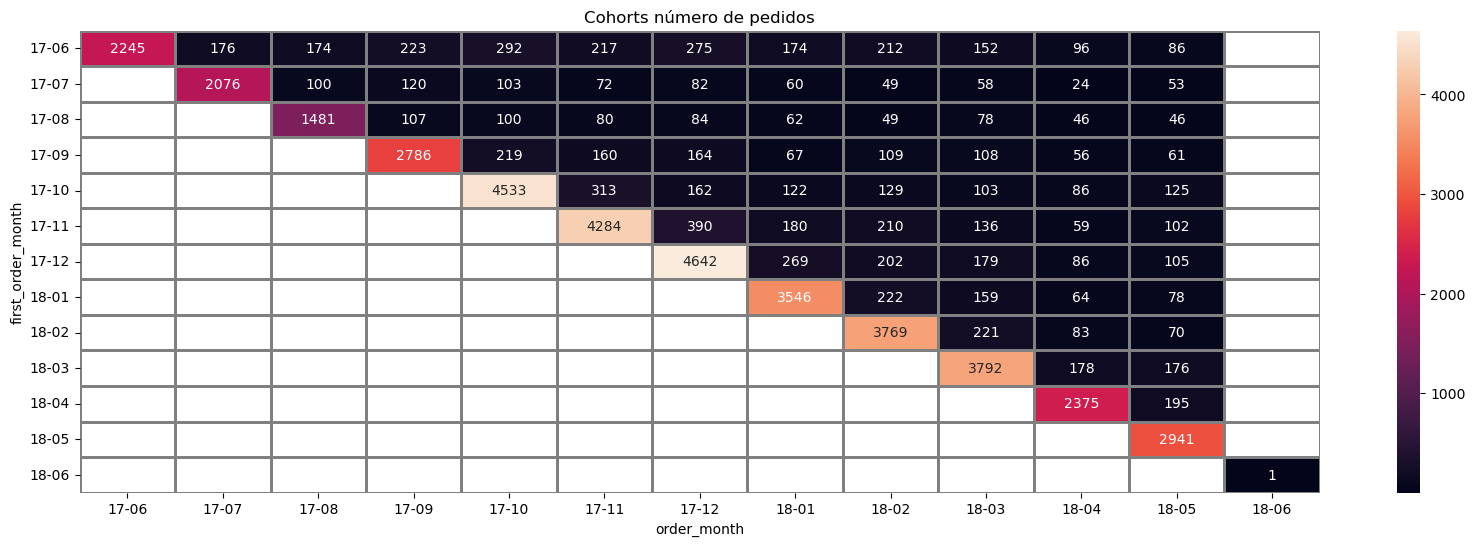

In [165]:
#Vamos a agrupar por las nuevas variables de meses creadas para los meses
orders_cohorts = orders.groupby(['first_order_month','order_month']).agg(
    {'uid': 'nunique', 'buy_ts': 'nunique','revenue':'sum'}
)
#Creamos una tabla para visualizar el cambio de pedidos generados de forma mensual
orders_pivot  = orders_cohorts.pivot_table(
                                    index = 'first_order_month',
                                    columns = 'order_month',
                                    values = 'buy_ts',
                                    aggfunc = 'sum')
#sns.style.use('while')
plt.figure(figsize=(20,6))
plt.title('Cohorts número de pedidos')
sns.heatmap(orders_pivot,annot=True,fmt='.0f',linewidths=1,linecolor='gray')

<h5><b>¿Cuál es el tamaño promedio de compra?</b></h5>

In [166]:
#Tenemos pedidos con revenue en 0, vamos a filtrar nuestros pedidos para eliminarlos y no considerarlos en nuestros análisis
filtered_orders = orders[orders['revenue'] > 0]

In [167]:
#Vamos a cálcular el promedio
mean_revenue = filtered_orders['revenue'].mean()
mode_revenue = filtered_orders['revenue'].mode()
print(f"En promedio el ingreso generado por compra es de: $ {mean_revenue:.2f}")
print(f"En cuanto al tamaño de compra más constante encontramos que fue: $ {mode_revenue[0]:.2f}")

En promedio el ingreso generado por compra es de: $ 5.00
En cuanto al tamaño de compra más constante encontramos que fue: $ 1.83


<Axes: ylabel='revenue'>

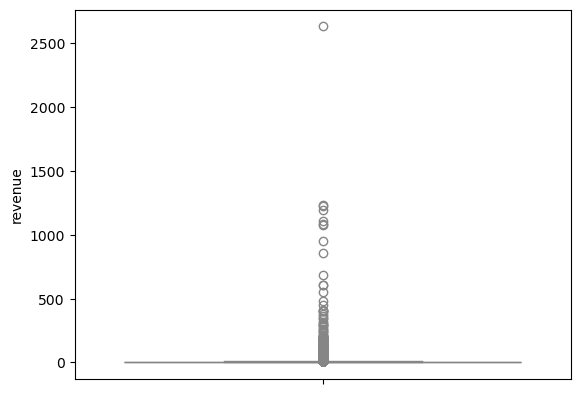

In [168]:
#Diagrama de caja general de los ingresos 
sns.boxplot(filtered_orders['revenue'], color='pink')

<h5><b>¿Cuánto dinero traen? (LTV)</b></h5>

In [169]:
#Vamos a agrupar por usuario y a sumar el igreso de cada uno de sus pedidos para calcualr el promedio.
users_revenues = filtered_orders.groupby(['uid']).agg({'revenue':'sum'})
mean_users = users_revenues['revenue'].mean()
max_users = users_revenues['revenue'].max()
min_users = users_revenues['revenue'].min()
mode_users = users_revenues['revenue'].mode()
print(f"En promedio el ingreso generado por cliente es de: {mean_users:.2f}")
print(f"El ingreso máximo por cliente fue de: {max_users:,.2f}")
print(f"El ingreso mínimo por cliente fue de: {min_users:.2f}")
print(f"La moda de ingresos del cliente fue de: {mode_users[0]:.2f}")

En promedio el ingreso generado por cliente es de: 6.90
El ingreso máximo por cliente fue de: 11,810.18
El ingreso mínimo por cliente fue de: 0.03
La moda de ingresos del cliente fue de: 2.44


<Axes: ylabel='revenue'>

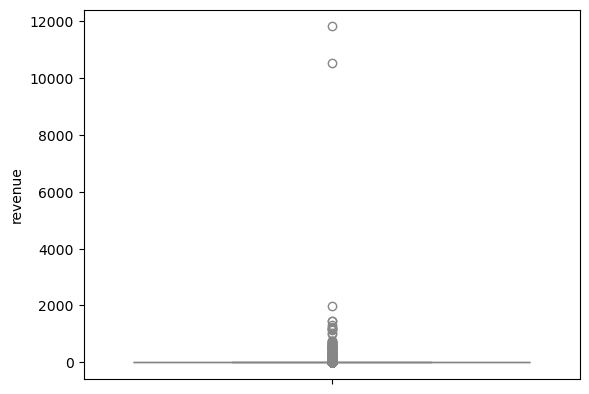

In [170]:
#Diagrama de caja general de los ingresos 
sns.boxplot(users_revenues['revenue'], color='pink')

<h4>Conclusiones Ventas:</h4>
<p>
Primero analizamos el comportamiento de nuestros clientes en relación con el tiempo que tardan en convertirse y generar una orden en nuestro sitio web. Obtuvimos los siguientes datos: en promedio general, se convierten 24 usuarios por día después de su primera visita. Al analizar un periodo de 30 días, encontramos que el promedio aumenta a 125 usuarios por día, lo cual indica que la mayoría de las conversiones ocurren durante los primeros días posteriores al primer acceso.<br>

Calculamos la moda de esta información y observamos que el día más común en el que los clientes se convierten es el día 0 después de su primera sesión. Al graficar esta información, se vuelve aún más evidente este comportamiento, ya que se observa un pico de conversiones en los primeros días, seguido de un descenso progresivo conforme pasan los días. Este hallazgo es importante para diseñar estrategias que fomenten la conversión desde el primer día de acceso, ya que entre más tiempo transcurre desde la primera visita, menores son las probabilidades de conversión.<br>

Posteriormente, analizamos las ventas por periodos de tiempo mensuales. Observamos que el mes con mayor número de pedidos fue diciembre de 2017. En promedio, se generan 3,878 pedidos por mes, y hay siete periodos que sobresalen del promedio general. Se destaca un patrón de aumento en los últimos tres meses del año, lo cual sugiere una estacionalidad positiva que podría ser aprovechada. Sería útil investigar qué estrategias se aplicaron en esos meses para replicarlas o adaptarlas, así como buscar oportunidades de mejora en los meses en los que los pedidos estuvieron por debajo de la media.<br>

Además, al analizar las cohortes por mes de adquisición, notamos que la mayoría de los pedidos se concentran en el mes de la primera compra. No obstante, algunas cohortes mantienen actividad en los meses siguientes, lo cual es una señal positiva de retención y de comportamiento de compra recurrente.<br>

El tamaño promedio por compra fue de 5.00, sin embargo, el valor más frecuente fue de 1.83. Al analizar el diagrama de caja, observamos que la mayor parte de los datos están concentrados cerca del valor mínimo, pero existen varios valores atípicos significativamente alejados de la media.<br>

Al calcular el LTV, obtuvimos que, en promedio, cada cliente genera 6.90 de ingreso a lo largo de su ciclo de vida. El cliente con mayor gasto generó 11,810.18, mientras que el que menos aportó solo 0.03. La moda de los ingresos por cliente fue de 2.44, lo que indica que muchos usuarios realizan compras pequeñas. Estos datos reflejan una distribución desigual, donde una pequeña proporción de clientes aporta la mayor parte de los ingresos.
Este patrón puede observarse claramente en el diagrama de caja, donde destacan los valores átipicos que representan a los clientes con mayores ingresos.<br>

Gracias a esta información podemos generar estrategías para motivar más a los clientes a consumir en mayor cantidad nuestros eventos o quiza promociones donde se fomente la compra de mas entradas con algún beneficio para crecer estos datos, así cómo estudiar las compras de aquellos clientes que encontramos nos generan mayores ingresos por orden. 

</p>


<h4>Marketing</h4>

<h5><b>¿Cuánto dinero se gastó?</b></h5>

In [171]:
#Vamos a cálcular el dinero total gastado
total_costs = costs['costs'].sum()
print(f"En total se gastó: $ {total_costs:,.2f}")

En total se gastó: $ 329,131.62


In [172]:
#Vamos a cálcular el dinero total gastado por fuente de adquisición
group_costs = costs.groupby('source_id')['costs'].sum().reset_index()
group_costs

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Text(0, 0.5, 'Gastos generados')

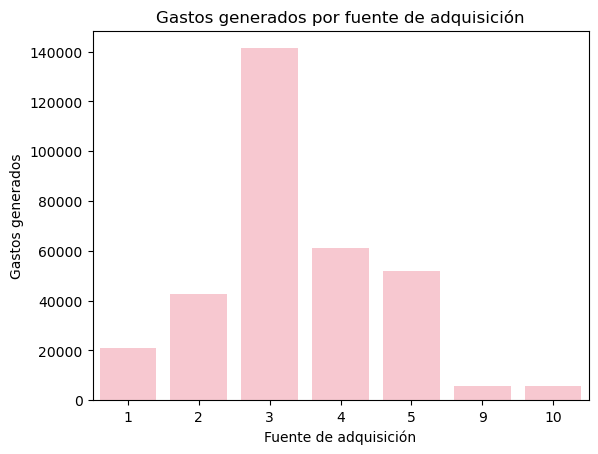

In [173]:
sns.barplot(data=group_costs,x='source_id', y='costs',color='pink')
plt.title('Gastos generados por fuente de adquisición')
plt.xlabel('Fuente de adquisición')
plt.ylabel('Gastos generados')

In [174]:
#Vamos a obtener los meses para crear una cohorte 
costs['costs_month'] = pd.to_datetime(costs['dt']).dt.strftime('%y-%m')
#Vamos a cálcular el dinero total gastado por periodo de tiempo
month_costs = costs.groupby('costs_month')['costs'].sum().reset_index()
#print(month_costs)

Text(0, 0.5, 'Gastos generados')

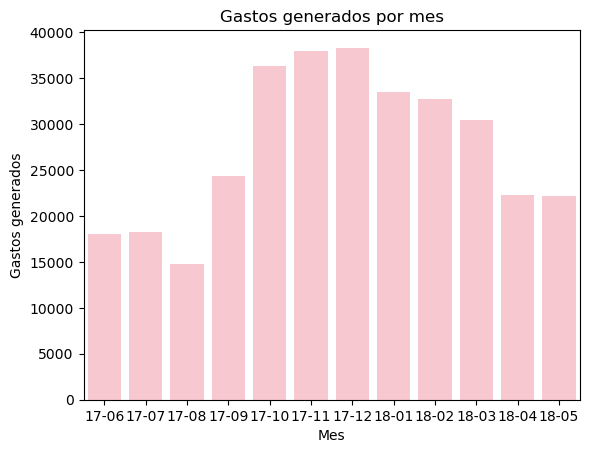

In [175]:
sns.barplot(data=month_costs,x='costs_month', y='costs',color='pink')
plt.title('Gastos generados por mes')
plt.xlabel('Mes')
plt.ylabel('Gastos generados')

<h5><b>¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?</b></h5>

In [176]:
#Vamos a obtener la primer visita de cada cliente
first_visits = visits.sort_values('start_ts').drop_duplicates('uid')
#Vamos a agrupar a los clientes y sumar los ingresos generados
clients = orders.groupby('uid')['revenue'].sum().reset_index()
#Vamos a unir el dato del source_id con los clientes
clients_merge = pd.merge(clients,first_visits[['start_ts','source_id','uid','device']], on='uid', how='left')

#Vamos a agrupar por fuente de adquisión y sumar los costos
group_source_costs = costs.groupby('source_id')['costs'].sum().reset_index()

#Vamos a agrupar por fuente de adquisión y sumar los ingresos
clients_per_source = clients_merge.groupby('source_id')['uid'].nunique().reset_index()
clients_per_source.columns = ['source_id', 'n_clients']

#Vamos a obtener el CAC (Costo de adquisición) por source
cac_join = group_source_costs.merge(clients_per_source, on='source_id')

#Cálculamos el CAC
cac_join['cac'] = cac_join['costs']/cac_join['n_clients']

# Agrupamos ingresos por source
revenue_per_source = clients_merge.groupby('source_id')['revenue'].sum().reset_index()

# Unimos con el número de clientes por source
ltv_df = pd.merge(revenue_per_source, clients_per_source, on='source_id')

# Calculamos el LTV por source
ltv_df['ltv'] = ltv_df['revenue'] / ltv_df['n_clients']

# Unir el cac con el ltv
final_df = pd.merge(cac_join, ltv_df[['source_id', 'ltv']], on='source_id')

final_df[['source_id', 'n_clients', 'costs', 'cac', 'ltv']]

,source_id,n_clients,costs,cac,ltv
0,1,2899,20833.27,7.186364,10.724577
1,2,3506,42806.04,12.209367,13.383802
2,3,10473,141321.63,13.493901,5.204931
3,4,10296,61073.60,5.931779,5.506685
4,5,6931,51757.10,7.467479,7.592558
5,9,1088,5517.49,5.071222,5.293566
6,10,1329,5822.49,4.381106,3.348631


Text(0, 0.5, 'CAC')

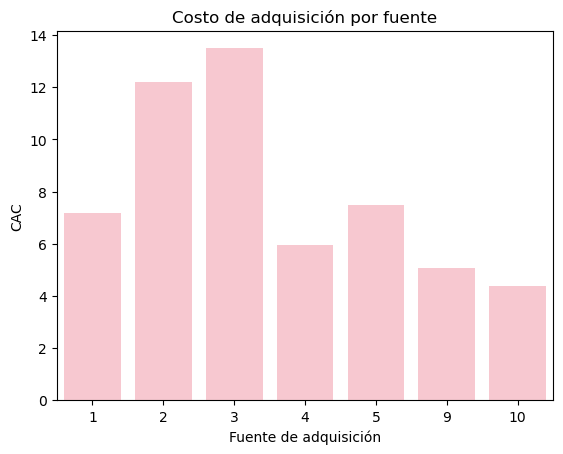

In [177]:
sns.barplot(data=cac_join,x='source_id', y='cac',color='pink')
plt.title('Costo de adquisición por fuente')
plt.xlabel('Fuente de adquisición')
plt.ylabel('CAC')

<h5><b>¿Cuán rentables eran las inversiones? (ROMI)</b></h5>

In [178]:
final_df['romi'] = final_df['ltv']/final_df['cac']
final_df

,source_id,costs,n_clients,cac,ltv,romi
0,1,20833.27,2899,7.186364,10.724577,1.492351
1,2,42806.04,3506,12.209367,13.383802,1.096191
2,3,141321.63,10473,13.493901,5.204931,0.385725
3,4,61073.60,10296,5.931779,5.506685,0.928336
4,5,51757.10,6931,7.467479,7.592558,1.016750
5,9,5517.49,1088,5.071222,5.293566,1.043844
6,10,5822.49,1329,4.381106,3.348631,0.764335


In [179]:
#Filtramos órdenes con mayor a 0
filtered_orders = orders[orders['revenue'] > 0]
#Buscamos el ingreso total por cliente
clients_revenue = filtered_orders.groupby('uid')['revenue'].sum()
#Contamos el número de compras por cliente
clients_orders = filtered_orders.groupby('uid')['revenue'].count()
#Cálculamos el promedio de ingresos por cliente
mean_revenue_per_user = clients_revenue.mean()
#Cálculamos el promedio de compras por cliente
mean_orders_per_user = clients_orders.mean()
#Cálculamos el promedio de ingreso por compra
mean_revenue_per_order = filtered_orders['revenue'].mean()
#Cálculamos LTV
ltv = mean_orders_per_user * mean_revenue_per_order
print(f"El LTV promedio es: ${ltv:.2f}")

El LTV promedio es: $6.90


In [180]:
#Vamos a obtener el CAC 
#Vamos a obtener todos los clientes
clients_unique = clients_merge['uid'].nunique()
#Vamos a obtener los costos totales
costs_totals = costs['costs'].sum()
cac = costs_totals/clients_unique
print(f"Costo de adquisición de cliente (CAC): ${cac:.2f}")

Costo de adquisición de cliente (CAC): $9.01


In [181]:
#Vamos a obtener el romi general
romi = ltv/cac
print(f"Retorno de inversión (ROMI): {romi:.2f}")

Retorno de inversión (ROMI): 0.77


In [182]:
#print(clients_merge)

<h5><b>Variaciones según el dispositivo</b></h5>

    device    uid
0  desktop  29211
1    touch   7312


Text(0, 0.5, 'Cantidad de usuarios')

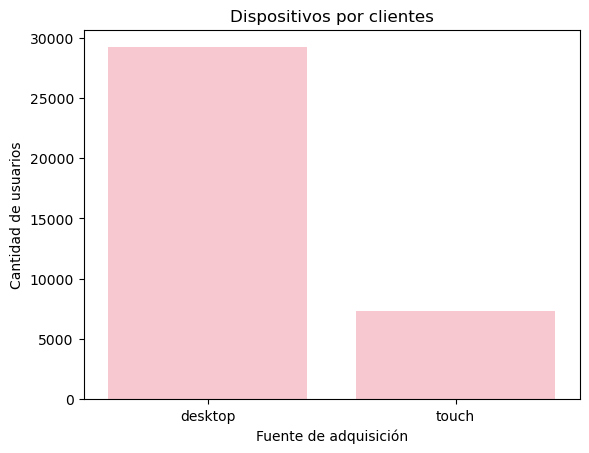

In [183]:
#Analizamos los dispositivos que utilizaron los clientes 
group_device = clients_merge.groupby('device')['uid'].nunique().reset_index()
print(group_device)
sns.barplot(data=group_device,x='device', y='uid',color='pink')
plt.title('Dispositivos por clientes')
plt.xlabel('Fuente de adquisición')
plt.ylabel('Cantidad de usuarios')

In [184]:
group_source_device = clients_merge.groupby(['source_id','device']).agg({
    'uid': 'nunique',
    'revenue': 'sum'
}).reset_index()
group_source_device
                                     

,source_id,device,uid,revenue
0,1,desktop,2264,25995.60
1,1,touch,635,5094.95
2,2,desktop,2649,40386.63
3,2,touch,857,6536.98
4,3,desktop,8724,46273.75
5,3,touch,1749,8237.49
6,4,desktop,7932,43414.96
7,4,touch,2364,13281.87
8,5,desktop,5705,46825.34
9,5,touch,1226,5798.68


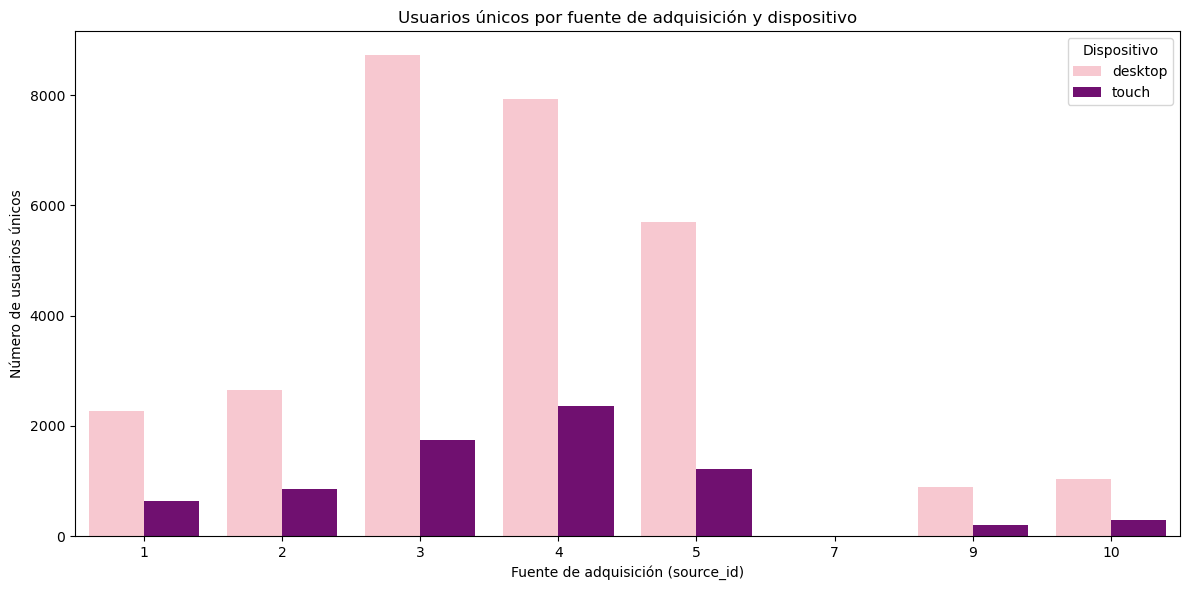

In [185]:
# Visualizamos con un gráfico de barras la cantidad de usuarios
plt.figure(figsize=(12,6))
sns.barplot(data=group_source_device, x='source_id', y='uid', hue='device',palette=['pink','purple'])

plt.title('Usuarios únicos por fuente de adquisición y dispositivo')
plt.xlabel('Fuente de adquisición (source_id)')
plt.ylabel('Número de usuarios únicos')
plt.legend(title='Dispositivo')
plt.tight_layout()
plt.show()
           

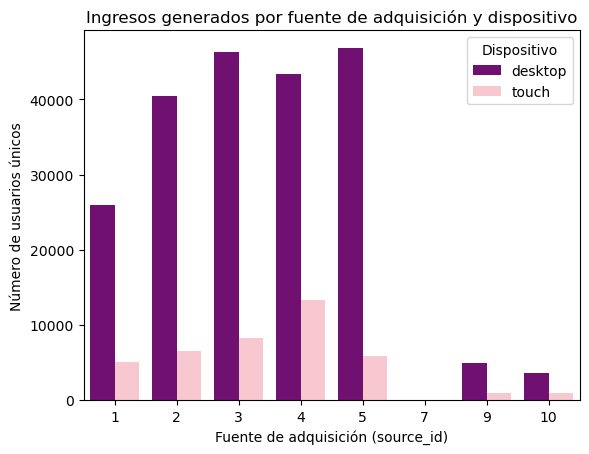

<Figure size 1200x600 with 0 Axes>

In [186]:
# Visualizamos con un gráfico de barras la cantidad de ingresos generados
sns.barplot(data=group_source_device, x='source_id', y='revenue', hue='device',palette=['purple','pink'])
plt.title('Ingresos generados por fuente de adquisición y dispositivo')
plt.xlabel('Fuente de adquisición (source_id)')
plt.ylabel('Número de usuarios únicos')
plt.legend(title='Dispositivo')
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

<h4>Conclusiones Marketing:</h4>
<p>
En total se invirtieron $329,131.62, distribuidos en siete distintas fuentes de adquisición, siendo la fuente 3 la que concentró la mayor inversión. En cuanto a los meses con mayor gasto, destaca un incremento significativo en los últimos tres meses de 2017 y los primeros tres meses de 2018. Este dato resulta relevante, ya que coincide con el análisis anterior donde observamos un aumento en los ingresos durante el cierre de 2017, confirmando así que la estrategia de generación de ingresos fue efectiva.<br>

En nuestro análisis del costo de adquisición de cliente (CAC), observamos que la fuente con el CAC más alto es nuevamente la fuente 3, seguida por la fuente 2. Esta información es relevante, ya que si bien se destinó la mayor inversión a la fuente 3, su alto CAC podría indicar que no fue rentable.<br>

Al analizar el ROMI (Retorno sobre la inversión en marketing), podemos identificar con mayor claridad el comportamiento de ingresos y costos por fuente. La fuente 1 presentó el mejor ROMI, indicando una alta rentabilidad, seguida de la fuente 9, aunque esta última tuvo un volumen bajo. También se destaca la fuente 5, que fue ligeramente rentable, pero con un volumen considerablemente mayor, lo cual podría hacerla más sostenible a largo plazo. Conocer esta información nos permite tomar decisiones más informadas sobre si es necesario modificar o eliminar fuentes poco rentables, y aumentar la inversión en aquellas que están generando mejores resultados.<br>

En términos generales, obtuvimos un LTV promedio de 6.90, un CAC de 9.01 y un ROMI de 0.77. Estos datos nos dan un panorama general que sugiere que la rentabilidad global no es positiva. Este resultado refuerza la necesidad de optimizar nuestras estrategias de adquisición, redirigir esfuerzos hacia las fuentes más rentables y reconsiderar la inversión en aquellas que no están generando retorno en este momento.<br>

Al analizar el comportamiento de los clientes según el dispositivo utilizado, destaca el uso de 'desktop' con 29,211 clientes, frente a 7,312 en dispositivos 'touch'. Esta diferencia significativa también se refleja en los ingresos generados por cada tipo de dispositivo. Este hallazgo sugiere la necesidad de revisar si nuestro sitio web está correctamente optimizado para dispositivos móviles, así como validar su usabilidad. Mejorar estos aspectos podría favorecer un incremento en el número de clientes móviles. Asimismo, sería recomendable analizar las campañas y fuentes que dirigen tráfico al sitio y, de ser necesario, reforzar la inversión en redes sociales para incentivar el uso desde dispositivos móviles.
</p>


<h3><b>Conclusiones generales</b></h3>

<p>
A partir de los análisis de tráfico, comportamiento del usuario, conversión, cohortes, ingresos y desempeño de las fuentes de adquisición, podemos llegar a las siguientes conclusiones:
<br><br>
Actualmente, el CAC promedio (9.01) es mayor que el LTV promedio (6.90), y el ROMI global es de 0.77. Esto indica que, en términos generales, la estrategia de adquisición no está siendo rentable. Por ello, no se recomienda aumentar la inversión total hasta ajustar y optimizar el mix de canales actuales.
<br><br>
Basándonos en el análisis del ROMI y el volumen de clientes por fuente, se recomienda redistribuir el presupuesto de marketing, fuente 1 (Mantener y aumentar inversión. Es la más rentable), fuente 9 (Considerar aumentar ligeramente la inversión, aunque con precaución por el bajo volumen), funete 5 (Es sostenible. Mantener inversión y buscar formas de optimizarla para mejorar rentabilidad), fuente 3 (Disminuir o suspender inversión. Alto CAC y bajo retorno)
<br><br>
Nos basamos en las siguientes métricas para obtener los resultados:<br>
- Cálculamos el LTV para conocer cuánto valor aporta cada cliente.<br>
- Cálculamos el coste de adquisición de cliente para entender cuánto cuesta traer un cliente nuevo.<br>
- Cálculamos el retorno de inversión en marketing para evaluar la restabilidad por fuente.<br>
- Cálculamos la frecuencia de compra y adherencia para detectar oportunidades de fidelización.<br>
- Analizamos la duración y tasa de conversión por día para identificar los puntos importantes en el comportamiento de los usuarios.
<br><br>
Al observar una estacionalidad positiva en los últimos tres meses del año, especialmente en diciembre. Se recomienda evaluar las campañas que se ejecutaron en esos periodos exitosos y buscar repetir elementos eficaces (tipo de anuncio, promociones, canal de adquisición)
<br><br>
Dado que el tráfico y conversiones desde dispositivos 'desktops' superan ampliamente a 'touch' (móviles) se recomienda revisar la versión móvil del sitio web, que su diseño sea responsivo, que tenga tiempos de carga correctos, que su navegación y proceso de compra sea sencillo de utilizar para el usuario. También se recomienda aumentar esfuerzos en redes sociales ya que son canales naturales de tráfico móvil.<br>

</p>